IPython Notebook usage at MSI
===================

Outline
-------

* Illustrate tunneling in
* cells - code + docs
  * modify and re-run
* command-line shell invocation
  * run commands
  * capture output
  * e.g. capture groupquota -a
* plotting - use a matplotlib demo
  * one of the GIS demos
  * show modify and re-run plotting
* show off notebook on github
* show nbviewer displaying from public github
* show configuring IPython profile to submit PBS jobs with qsub

Tunneling
---------

For running on mesabi, first SSH in the usual way (SSH keys are recommended) and start an interactive job:

`ssh login.msi.umn.edu
ssh mesabi
qsub -I -lwalltime=1:00:00 -lnodes=1:ppn=2`

Then start the IPython notebook server on the infiniband interface (so we can connect through login host):

`module load python-epd
ipython notebook --no-browser --port=12345 --ip=in-$(hostname).mesabi`

This will print something like:

`[I 10:02:58.191 NotebookApp] 0 active kernels
[I 10:02:58.191 NotebookApp] The IPython Notebook is running at: http://in-cn0658.mesabi:12345/
[I 10:02:58.191 NotebookApp] Use Control-C to stop this server and shut down all kernels (twice to skip confirmation).
`

From inside MSI just open that URL in a web browser. To open the URL from outside MSI, create a new ssh tunnel based on the URL from your local computer:

`ssh -L 12345:in-cn0658.mesabi:12345 login.msi.umn.edu`

And open the URL in your web browser as `localhost:12345`

IPython shell and cells
--------------

Code and documentation live in **cells**

Code executed in cells captures results. All code executed in a notebook runs in the same python session.

In [6]:
range(20)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [8]:
_6[4] * 20

80

Abundance of magic commands automate common tasks.

In [3]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %install_default_config  %install_ext  %install_profiles  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%latex  %%perl  %%pr

In [10]:
!ls

ipython.o1173016  Monitoring an MPI Simulation - 1.ipynb  pbs_engines
ipython.o1173018  MSI Examples.ipynb			  README.md


In [12]:
import numpy as np

In [8]:
(np.random.randn(10000)**2).sum()

9738.9450546092739

In [13]:
%%timeit
a = np.random.randn(10**6)**2
a.sum()

10 loops, best of 3: 61.6 ms per loop


Command-line shell tools
---------------

In [13]:
!git status

# On branch master
# Changed but not updated:
#   (use "git add <file>..." to update what will be committed)
#   (use "git checkout -- <file>..." to discard changes in working directory)
#
#	modified:   MSI Examples.ipynb
#
# Untracked files:
#   (use "git add <file>..." to include in what will be committed)
#
#	.ipynb_checkpoints/
no changes added to commit (use "git add" and/or "git commit -a")


In [1]:
quotas = !qstat
quotas[-5:]

['582055.mesabim3            04_kraken2       knut0297        00:02:15 R ram1t          ',
 '582056.mesabim3            05_krona2        knut0297               0 H ram1t          ',
 '582057.mesabim3            STDIN            blgross         00:00:00 R small          ',
 '582058.mesabim3            snp.pbs          zangx020        00:02:58 R small          ',
 '582059.mesabim3            wombat_jets      oneil468               0 Q widest         ']

In [2]:
%%latex
Yes, you can use MathJax to render LaTeX math!
\begin{aligned}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\
\nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0
\end{aligned}

<IPython.core.display.Latex object>

Plotting
--------



In [14]:
%matplotlib inline

Now we are set to capture the output of plotting actions in the notebook. By default the plot data is stored along with the notebook, but we can always re-run the cells to refresh the plot.

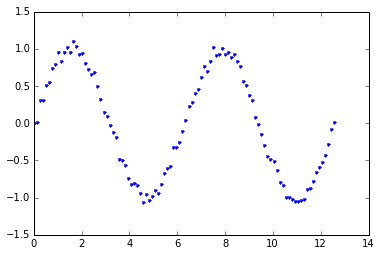

In [17]:
import matplotlib.pyplot as plt
x = np.linspace(0,4*np.pi,100)
y = np.sin(x) + np.random.randn(100)/20
plt.plot(x,y,'.')

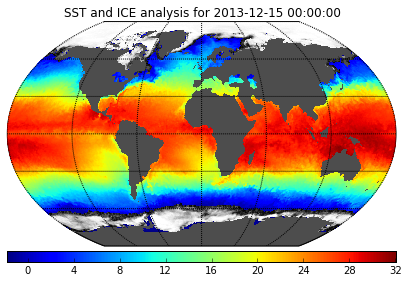

In [19]:
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset, date2index
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
date = datetime(2013,12,15,0) # date to plot.
# open dataset.
dataset = Dataset('http://www.ncdc.noaa.gov/thredds/dodsC/OISST-V2-AVHRR_agg')
timevar = dataset.variables['time']
timeindex = date2index(date,timevar) # find time index for desired date.
# read sst.  Will automatically create a masked array using
# missing_value variable attribute. 'squeeze out' singleton dimensions.
sst = dataset.variables['sst'][timeindex,:].squeeze()
# read ice.
ice = dataset.variables['ice'][timeindex,:].squeeze()
# read lats and lons (representing centers of grid boxes).
lats = dataset.variables['lat'][:]
lons = dataset.variables['lon'][:]
lons, lats = np.meshgrid(lons,lats)
# create figure, axes instances.
fig = plt.figure()
ax = fig.add_axes([0.05,0.05,0.9,0.9])
# create Basemap instance.
# coastlines not used, so resolution set to None to skip
# continent processing (this speeds things up a bit)
m = Basemap(projection='kav7',lon_0=0,resolution=None)
# draw line around map projection limb.
# color background of map projection region.
# missing values over land will show up this color.
m.drawmapboundary(fill_color='0.3')
# plot sst, then ice with pcolor
im1 = m.pcolormesh(lons,lats,sst,shading='flat',cmap=plt.cm.jet,latlon=True)
im2 = m.pcolormesh(lons,lats,ice,shading='flat',cmap=plt.cm.gist_gray,latlon=True)
# draw parallels and meridians, but don't bother labelling them.
m.drawparallels(np.arange(-90.,99.,30.))
m.drawmeridians(np.arange(-180.,180.,60.))
# add colorbar
cb = m.colorbar(im1,"bottom", size="5%", pad="2%")
# add a title.
ax.set_title('SST and ICE analysis for %s'%date)
plt.show()

We can also use external graphics -- handy if we want to work with images that another program is generating.

In [4]:
from IPython.display import Image
Image(url='https://www.msi.umn.edu/sites/default/files/badge-hpc.png')

Version control and public display
-----------

Notebooks use a text representation, amenable to version control.

Check this one out in Github: https://github.umn.edu/milligan/msi-ipython-nb-ex

If you put the notebook somewhere world-readable, the notebook viewer web interface allows read-only publication:

http://nbviewer.ipython.org/github/mbmilligan/msi-ipython-nb-ex/blob/master/MSI%20Examples.ipynb

Parallel engines
---------------

See IPython dashboard tab for available notebooks, cluster profiles, etc

To run a number of engines on the local machine, use the "default" profile under the Clusters tab, enter the number of CPUs you requested for the interactive job, and press Start.

We can set up a "mesabi" profile with a PBS script template to run larger interactive jobs through the web interface. This requires a few steps, but only has to be done once. Then you will use fewer SUs by only requesting 1 or 2 cores for your interactive job, and starting and stopping the "mesabi" cluster profile as needed.

`ipython profile create --parallel mesabi`

This creates a new profile directory in `~/.ipython/profile_mesabi`

In that directory there are configuration files for the cluster infrastructure. In `ipcluster_config.py` I set:

    c.IPClusterStart.controller_launcher_class = 'Local'
    c.IPClusterStart.engine_launcher_class = 'PBS'
    c.PBSEngineSetLauncher.queue = u'mesabi'

    c.PBSEngineSetLauncher.batch_template = """
    #PBS -N ipython
    #PBS -j oe
    #PBS -l walltime=01:00:00
    #PBS -l nodes={1 + n/24}:ppn={min(n,24)}
    #PBS -q {queue}

    cd {profile_dir}
    module load python-epd
    mpiexec -n {n} ipengine --profile-dir={profile_dir}
    """



In this configuration, the cluster controller will run alongside my notebook server on the head node, but the engines will be started using PBS and mpiexec.

In `ipcontroller_config.py` I set:

    c.HubFactory.ip = u'*'

This tells the controller to listen on all interfaces, which should be safe enough since the headnode doesn't accept outside connections. However, remember that there isn't any user authentication on this socket; in principle another user inside MSI could listen in.

With that done, we can use the dashboard's Clusters tab to start the newly defined itasca engines.

In [5]:
!qstat -u $USER


mesabim3.msi.umn.edu: 
                                                                                  Req'd    Req'd       Elap
Job ID                  Username    Queue    Jobname          SessID  NDS   TSK   Memory   Time    S   Time
----------------------- ----------- -------- ---------------- ------ ----- ------ ------ --------- - ---------
582032.mesabim3.msi.um  milligan    small    STDIN             29489     1      8    2gb  02:00:00 R  00:48:15


In [19]:
from IPython import parallel
clients = parallel.Client(profile="mesabi") # just leave out the profile argument to get the default
print clients.ids

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


In [20]:
%%px
import numpy as np
a = np.random.randn(2,2)
np.linalg.eigvals(a)

Out[0:2]: array([-1.23828183,  0.32602899])

Out[1:2]: array([ 1.85896049, -1.2927187 ])

Out[2:2]: array([-0.42273752,  1.12569741])

Out[3:2]: array([-2.81817145,  0.15612035])

Out[4:2]: array([ 0.38912442+0.94707862j,  0.38912442-0.94707862j])

Out[5:2]: array([ 1.73999805, -0.03042708])

Out[6:2]: array([-0.07490146+0.84744246j, -0.07490146-0.84744246j])

Out[7:2]: array([-0.98787937+0.3949985j, -0.98787937-0.3949985j])

Out[8:2]: array([ 1.52444805,  0.14473499])

Out[9:2]: array([-0.91832427+0.71093083j, -0.91832427-0.71093083j])

Out[10:2]: array([-1.73197107,  0.0532603 ])

Out[11:2]: array([-0.63234298,  0.35662109])

Out[12:2]: array([-0.65087267,  0.11887212])

Out[13:2]: array([-1.81464555,  0.65319432])

Out[14:2]: array([ 1.33543795,  0.08128808])

Out[15:2]: array([-0.54138563+0.18162899j, -0.54138563-0.18162899j])

Out[16:2]: array([-1.65893867, -0.77771344])

Out[17:2]: array([-1.19855262, -0.38562693])

Out[18:2]: array([-0.47556664+0.77769789j, -0.47556664-0.77769789j])

Out[19:2]: array([-0.3321334+0.43182318j, -0.3321334-0.43182318j])

Out[20:2]: array([-0.13097169+1.28209681j, -0.13097169-1.28209681j])

Out[21:2]: array([-0.11605382,  2.32543048])

Out[22:2]: array([-1.42649208,  0.04683155])

Out[23:2]: array([ 1.95564604, -0.32200787])

Out[24:2]: array([-0.55882193,  1.38235113])

Out[25:2]: array([ 0.50955738, -0.45085802])

Out[26:2]: array([ 0.06388522, -2.38035709])

Out[27:2]: array([-1.21319699, -0.01249812])

Out[28:2]: array([-0.34481051+0.69278978j, -0.34481051-0.69278978j])

Out[29:2]: array([-1.03354389, -0.33060661])

Out[30:2]: array([ 1.16148094, -1.0178418 ])

Out[31:2]: array([-0.23608131+0.75300971j, -0.23608131-0.75300971j])

In [6]:
!ps xw

  PID TTY      STAT   TIME COMMAND
 3585 pts/0    Sl     0:00 /panfs/roc/itascasoft/python-epd/1.5.2/Canopy_64bit/User/bin/python -m IPython.kernel -f /panfs/roc/group
 5764 pts/0    Sl     0:00 /panfs/roc/itascasoft/python-epd/1.5.2/Canopy_64bit/User/bin/python -m IPython.kernel -f /panfs/roc/group
17614 pts/1    Rs+    0:00 ps xw
29521 pts/0    S+     0:00 -bash
29676 pts/0    Sl     0:06 /panfs/roc/itascasoft/python-epd/1.5.2/Canopy_64bit/User/bin/python /panfs/roc/itascasoft/python-epd/1.5.
